In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [3]:
import matplotlib.pyplot as plt

In [5]:
print(X)

[[ 0.82321545 -0.11697552]
 [ 0.37514771 -0.73115232]
 [ 0.26947761 -0.7081059 ]
 [-4.98744874 -2.01199214]
 [ 0.4231285   1.63493163]
 [-4.2289949   0.15599044]
 [-5.18865382  1.07782053]
 [ 0.7096287   0.80626713]
 [ 0.06531501  0.74859527]
 [-5.3563263   0.75152794]
 [-5.17487315 -0.90114581]
 [-5.17644221 -0.1815243 ]
 [ 0.60202649 -2.98092432]
 [ 1.42960231  1.20500136]
 [-5.22359581  0.78302407]
 [ 1.01127528  0.42968688]
 [ 0.48288133 -0.73229726]
 [-5.27614308 -0.83930476]
 [ 0.44163889  0.83727062]
 [-5.167179   -0.10255323]
 [-5.67316396  0.65867001]
 [-5.4617787   0.92649819]
 [-4.71348919  0.10216193]
 [ 2.2344006   0.46886454]
 [-4.61308761  0.45432938]
 [ 1.2379403   1.8613386 ]
 [-5.18419324 -0.79255991]
 [-4.43807529 -1.0004391 ]
 [-5.79725951 -0.53814137]
 [-5.2004182   0.44027716]
 [-4.83733981  0.27047889]
 [ 1.97386778 -0.75869267]
 [ 0.84916967  0.6802322 ]
 [ 1.16085327  0.17018845]
 [ 1.17880259 -1.01121977]
 [ 0.30218616 -0.8394709 ]
 [-4.38479615  0.90327412]
 

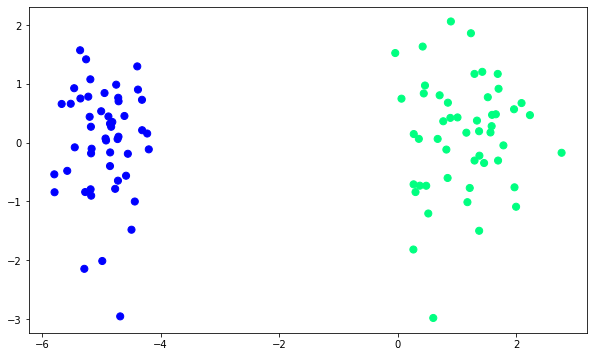

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c = y, cmap='winter', s= 50)

In [8]:
X.shape[1]

2

In [15]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0], weights[1:]
        

In [16]:
def step(z):
    return 1 if z > 0 else 0

In [17]:
intercepts_, coef_ = perceptron(X, y)

In [9]:
print(coef_)
print(intercepts_)

[1.1204053  0.40381514]
1.2000000000000002


In [10]:
m = -(coef_[0]/coef_[1])
b = - (intercepts_/coef_[1])

In [11]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

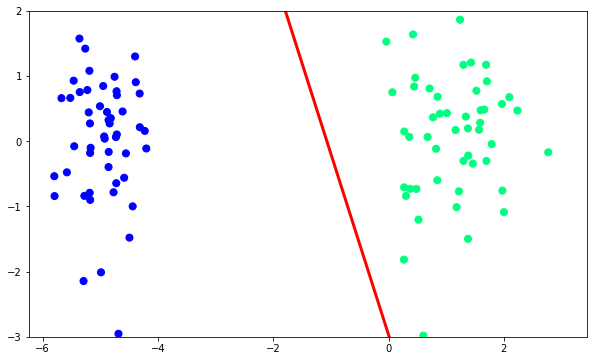

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color = 'red', linewidth = 3)
plt.scatter(X[:,0], X[:,1], c = y, cmap='winter', s= 50)
plt.ylim(-3, 2)

In [13]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [14]:
m,b = perceptron(X,y)

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


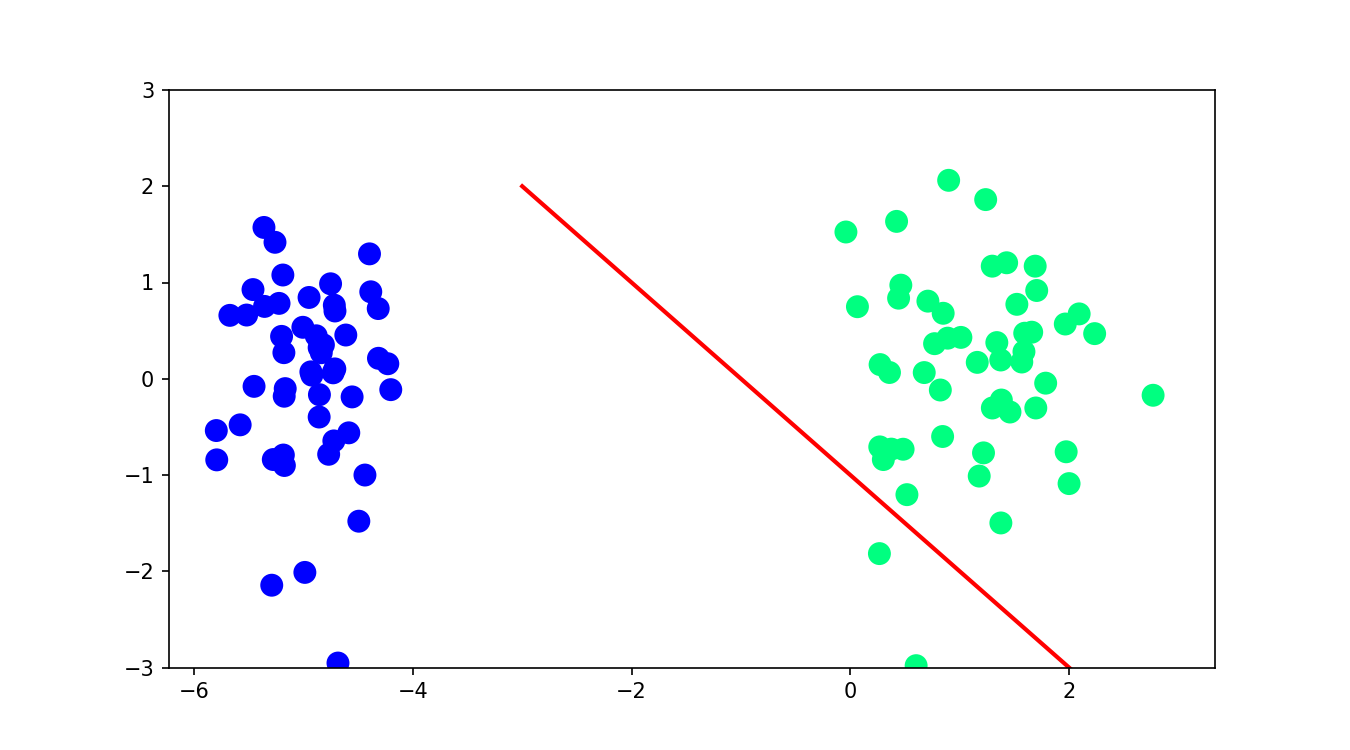

In [16]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [19]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


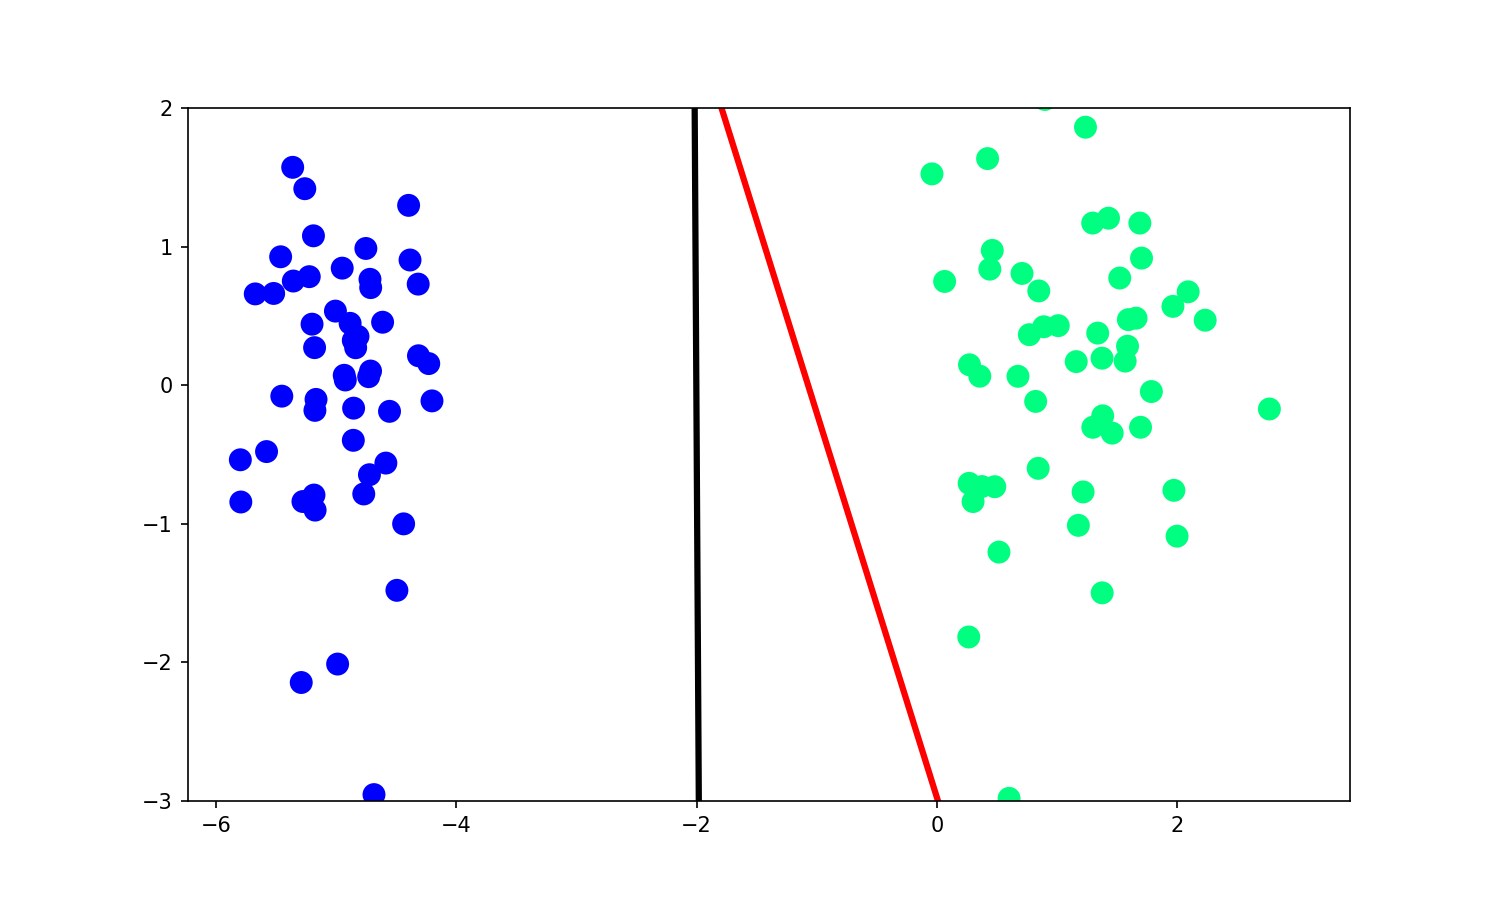

(-3.0, 2.0)

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)